In [1]:
import pandas as pd
import numpy as np
auctions_dtypes = {'auction_type_id': np.float16, 'country': 'category', 'platform': 'category',
                   'ref_type_id': 'category', 'source_id': 'category', 'device_id': 'category'}
auctions = pd.read_csv('auctions.csv', dtype = auctions_dtypes)

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
auctions.drop('auction_type_id', axis = 1, inplace = True)
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")

In [4]:
installs_dtypes = {'application_id': 'category', 'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}
installs = pd.read_csv('installs.csv', dtype = installs_dtypes)

installs.drop('attributed', axis = 1, inplace = True) #son todas false
installs.drop('click_hash', axis = 1, inplace = True) #son todas NaN

installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce")

# ¿Cuál es la probabilidad de que se produzca una conversión según el día de la semana y la hora del día?

In [5]:
auctions.head(2)

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0


In [6]:
installs.head(2)

,created,application_id,ref_type,ref_hash,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN


In [7]:
auctions['hora'] = auctions['date'].dt.hour
auctions['dia_de_la_semana'] = auctions['date'].dt.dayofweek
auctions['cant_subastas'] = 1

In [8]:
installs['hora'] = installs['created'].dt.hour
installs['dia_de_la_semana'] = installs['created'].dt.dayofweek
installs['cant_instalaciones'] = 1

In [9]:
installs.head(3)

,created,application_id,ref_type,ref_hash,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,hora,dia_de_la_semana,cant_instalaciones
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,1,2,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,4,2,1
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18,4,2,1


In [10]:
agrupamiento_instalaciones = installs.groupby(['hora', 'dia_de_la_semana']).agg({'cant_instalaciones': 'count'})

In [11]:
agrupamiento_instalaciones.head(10)

cant_instalaciones
hora dia_de_la_semana                    
0    0                                 17
     1                                 42
     2                                 42
     3                                 24
     4                                 33
     5                                 17
     6                                 23
1    0                                 28
     1                                 42
     2                                 44

In [12]:
agrupamiento_subastas = auctions.groupby(['hora', 'dia_de_la_semana']).agg({'cant_subastas': 'count'})

In [13]:
agrupamiento_instalaciones_desapilado = agrupamiento_instalaciones.unstack()['cant_instalaciones'] 
#completa con NaN si en un determinada hora y dia de la semana no hubo instalaciones

In [14]:
agrupamiento_instalaciones_desapilado.head(8)

dia_de_la_semana,0,1,2,3,4,5,6
hora,,,,,,,
0,17.0,42.0,42.0,24.0,33.0,17.0,23.0
1,28.0,42.0,44.0,20.0,14.0,25.0,18.0
2,28.0,38.0,35.0,16.0,12.0,19.0,26.0
3,9.0,22.0,29.0,16.0,13.0,14.0,12.0
4,15.0,13.0,21.0,8.0,6.0,10.0,3.0
5,3.0,9.0,9.0,5.0,3.0,5.0,4.0
6,1.0,5.0,NaN,1.0,2.0,5.0,4.0
7,NaN,8.0,3.0,1.0,3.0,4.0,2.0


In [15]:
agrupamiento_instalaciones_desapilado = agrupamiento_instalaciones_desapilado.fillna(0)

In [16]:
agrupamiento_subastas_desapilado = agrupamiento_subastas.unstack()['cant_subastas']

In [17]:
porcentajes = pd.DataFrame((agrupamiento_instalaciones_desapilado*100)/agrupamiento_subastas_desapilado)

In [18]:
porcentajes.head(3)

dia_de_la_semana,0,1,2,3,4,5,6
hora,,,,,,,
0,0.008342,0.022579,0.017246,0.071187,0.022346,0.010656,0.073132
1,0.014150,0.011786,0.013200,0.027047,0.007796,0.016175,0.023854
2,0.015074,0.011934,0.010629,0.013608,0.009033,0.013842,0.015540


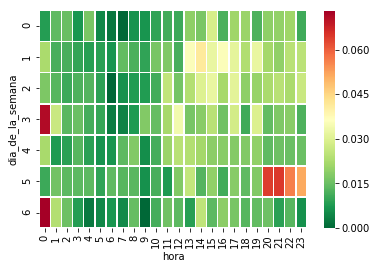

In [19]:
sns.heatmap(porcentajes.T, cmap='RdYlGn_r', linewidths=0.5)